Problem 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

For the loss function, I chose hinge loss, since I've had experience with it with regards to SVMs, since they are also classifiers

The gradient for hinge loss depends on whether or not the hinge loss is non-zero, which means a conditional expression is required to evaluate the gradient

In [2]:
def hinge_loss(x, y, w):
  loss = 0
  gradient = 0
  for i in range(np.size(y)):
    x_i = x[i]
    y_i = y[i]
    loss += max(0, 1 - x_i @ w * y_i)
    if y_i * x_i @ w >= 1:
      gradient += 0
    else:
      gradient += -y_i * x_i
  return (loss, gradient)

The gradient descent procedure calls the hinge loss function, which returns the loss itself as well as the gradient of the loss function for that specific set of arguments $W$

In [3]:
def gradient_descent(x, y, w, stepSize, threshold = 0):
  gradient = np.inf
  loss_change = np.inf
  previous_loss = np.inf
  while(np.abs(loss_change) > threshold):
    loss, gradient = hinge_loss(x, y, w)
    loss_change = previous_loss - loss
    previous_loss = loss
    w = w - stepSize * gradient

  return w

In [4]:

def yAt(x, a, b, c):
  return (-a/b)*x + (-c/b)

def distanceFrom(x, y, a, b, c):
  return abs((a*x + b*y + c) / np.sqrt(a**2 + b**2))

b = 0
while(b == 0):
  b = np.random.normal(loc = 0)

a = np.random.normal(loc = 0)
c = np.random.normal(loc = 0)

The same data generation procedure from Problem 1 is followed here


In [5]:
counter = 0
D1 = []
D2 = []
gamma = 0.125 
while counter  < 1000:
  x_i = np.random.randn() 
  y_i = np.random.randn() 
  if distanceFrom(x_i, y_i, a, b, c) > gamma:
    counter += 1
    if y_i > yAt(x_i, a, b, c):
      D1.append([x_i, y_i])
    else:
      D2.append([x_i, y_i])

D1 = np.array(D1)
D2 = np.array(D2)
print(D1.shape)
print(D2.shape)

(239, 2)
(761, 2)


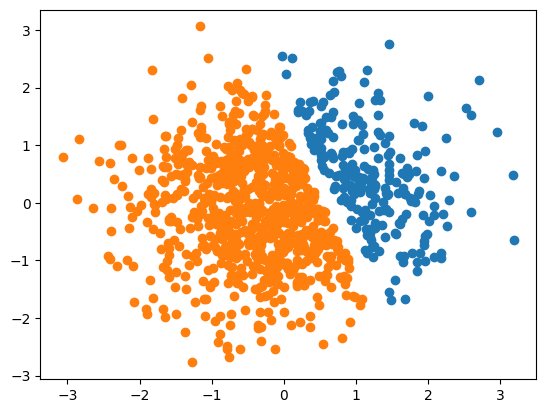

In [6]:
plt.scatter(D1[:, 0], D1[:,1])
plt.scatter(D2[:, 0], D2[:,1])
plt.show()

In [7]:

X = np.ones((1000, 3))
D = np.concatenate((D1, D2), axis = 0)
X[:,:2] = D
Y = np.empty((np.size(X, 0), 1))
Y[:np.size(D1, 0), 0] = 1
Y[np.size(D1, 0):, 0] = -1
W = np.zeros(np.size(X, 1))
print(W.shape)

(3,)


In [8]:
W = gradient_descent(X, Y, W, 0.1,)
print(W)

[ 66.3280833   26.07446419 -50.4       ]


The graph is zoomed in to show the classifier in action

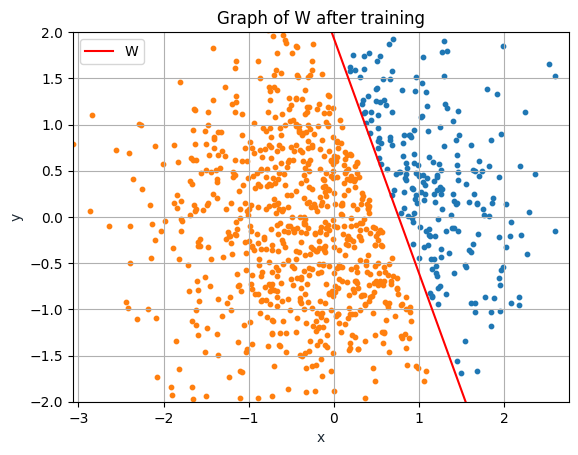

In [9]:

x = np.linspace(-5,5,100)
y = -(W[0].item()/W[1].item())*x - (W[2].item()/W[1].item())
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W after training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(D1[:,0], D1[:,1], s = 10)
plt.scatter(D2[:,0], D2[:,1], s = 10)
plt.xlim(min(D1[:, 0].min(), D2[:,0].min()), max(D1[:,1].max(), D1[:,1].max()))
plt.ylim(-2, 2)
plt.grid()
plt.show()